# Neural Networks

## Introduction

In [2]:
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [3]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(int)

per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

In [4]:
y_pred

array([1])

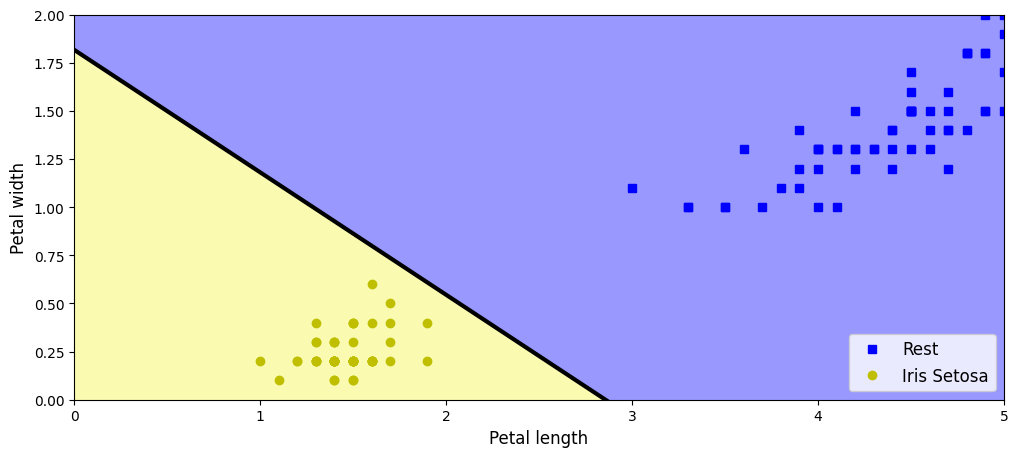

In [5]:
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap


a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
    np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
    np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
)

X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(12, 5))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Rest")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)

custom_color_map = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_color_map)
plt.xlabel("Petal length", fontsize=12)
plt.ylabel("Petal width", fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.axis(axes)
plt.show()

## Activation functions

In [6]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=1e-6):
    return (f(z + eps) - f(z - eps)) / (2 * eps)

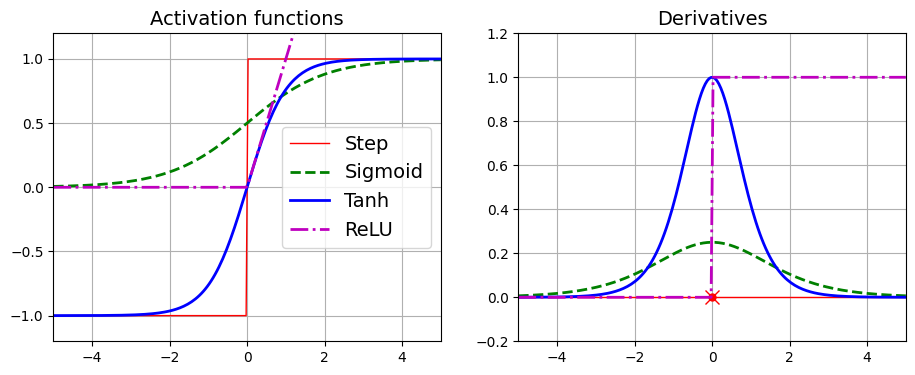

In [7]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show()

In [8]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

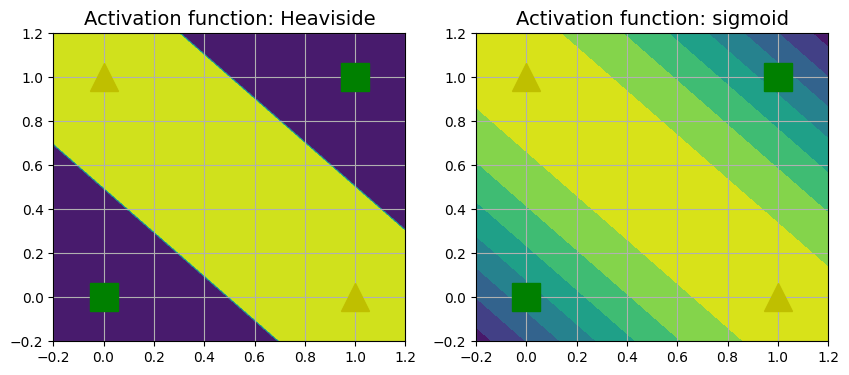

In [9]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: Heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

## Creating image classification model

### Downloading MNIST fashion data from keras datasets

In [10]:
import tensorflow as tf
from tensorflow import keras

In [11]:
print(tf.__version__)

2.18.0


In [12]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [13]:
print(X_train_full.shape)
print(y_train_full.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Splitting the training set into training and validation sets

In [14]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

### Example image

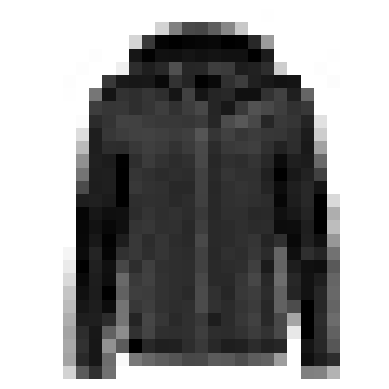

In [15]:
plt.imshow(X_train[0], cmap="binary")
plt.axis("off")
plt.show()

In [16]:
y_train[0]

4

In [17]:
class_names = ["T-Shirt", "Trousers", "Sweatshirt", "Dress", "Coat",
               "Sandals", "Shirt", "Sneakers", "Purse", "Boots"]

In [18]:
class_names[y_train[0]]

'Coat'

In [19]:
print(X_valid.shape)
print(X_test.shape)

(5000, 28, 28)
(10000, 28, 28)


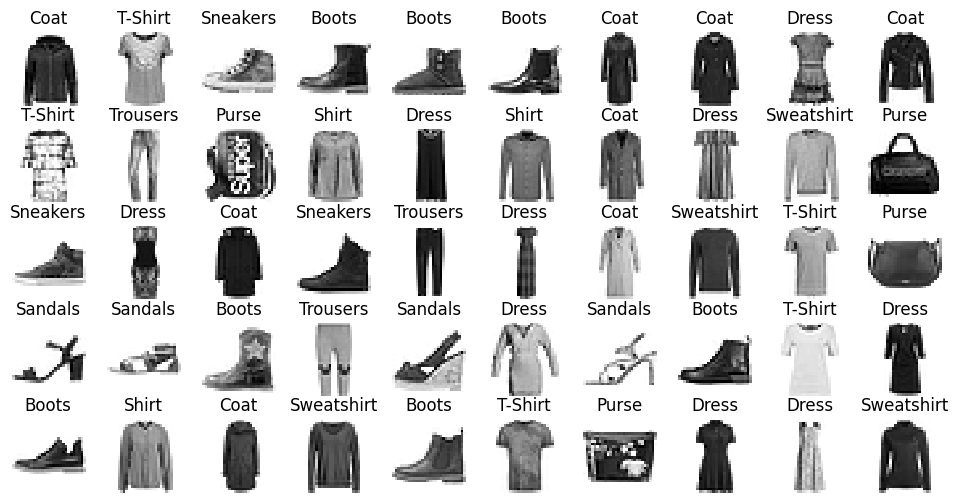

In [20]:
n_rows = 5
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis("off")
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

### California Housing

In [21]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [22]:
housing = fetch_california_housing()

In [23]:
dir(housing)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [24]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [25]:
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, test_size=0.2, random_state=42
)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42
)

In [26]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [27]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss='mean_squared_error', optimizer='sgd')
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/20


/Users/Bartek/Desktop/Bartek/Programowanie/Portfolio/venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step - loss: 1.3076 - val_loss: 0.8019
Epoch 2/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step - loss: 0.5459 - val_loss: 0.4818
Epoch 3/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 528us/step - loss: 0.4396 - val_loss: 0.4540
Epoch 4/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step - loss: 0.4130 - val_loss: 0.4210
Epoch 5/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step - loss: 0.3969 - val_loss: 0.4117
Epoch 6/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step - loss: 0.3806 - val_loss: 0.4103
Epoch 7/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step - loss: 0.3779 - val_loss: 0.3925
Epoch 8/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step - loss: 0.3459 - val_loss: 0.4297
Epoch 9/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 517us/step - loss: 0.3680 - val_loss: 0.3869
Epoch 10/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step - loss: 0.3651 - val_loss: 0.3840
Epoch 11/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step - loss: 0.3581 - val_loss: 0.3793
Epoch 12/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 

In [28]:
X_new = X_test[:3]

In [29]:
y_pred = model.predict(X_new)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


In [30]:
print(mse_test)

0.350780725479126


### WIDE & DEEP

In [31]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(10, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

In [32]:
# splitting data into two trails
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [33]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ deep_input          │ (None, 6)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 30)        │        210 │ deep_input[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ wide_input          │ (None, 5)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 30)        │        930 │ dense_5[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 35)        │          0 │ wide_input[0][0], │
│ (Concatenate)       │                   │            │ dense_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output (Dense)      │ (None, 1)         │         36 │ concatenate_1[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,176 (4.59 KB)

 Trainable params: 1,176 (4.59 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
hidden1 = model.layers[1]
weights, biases = hidden1.get_weights()

In [35]:
weights.shape

(6, 30)

In [36]:
biases.shape

(30,)

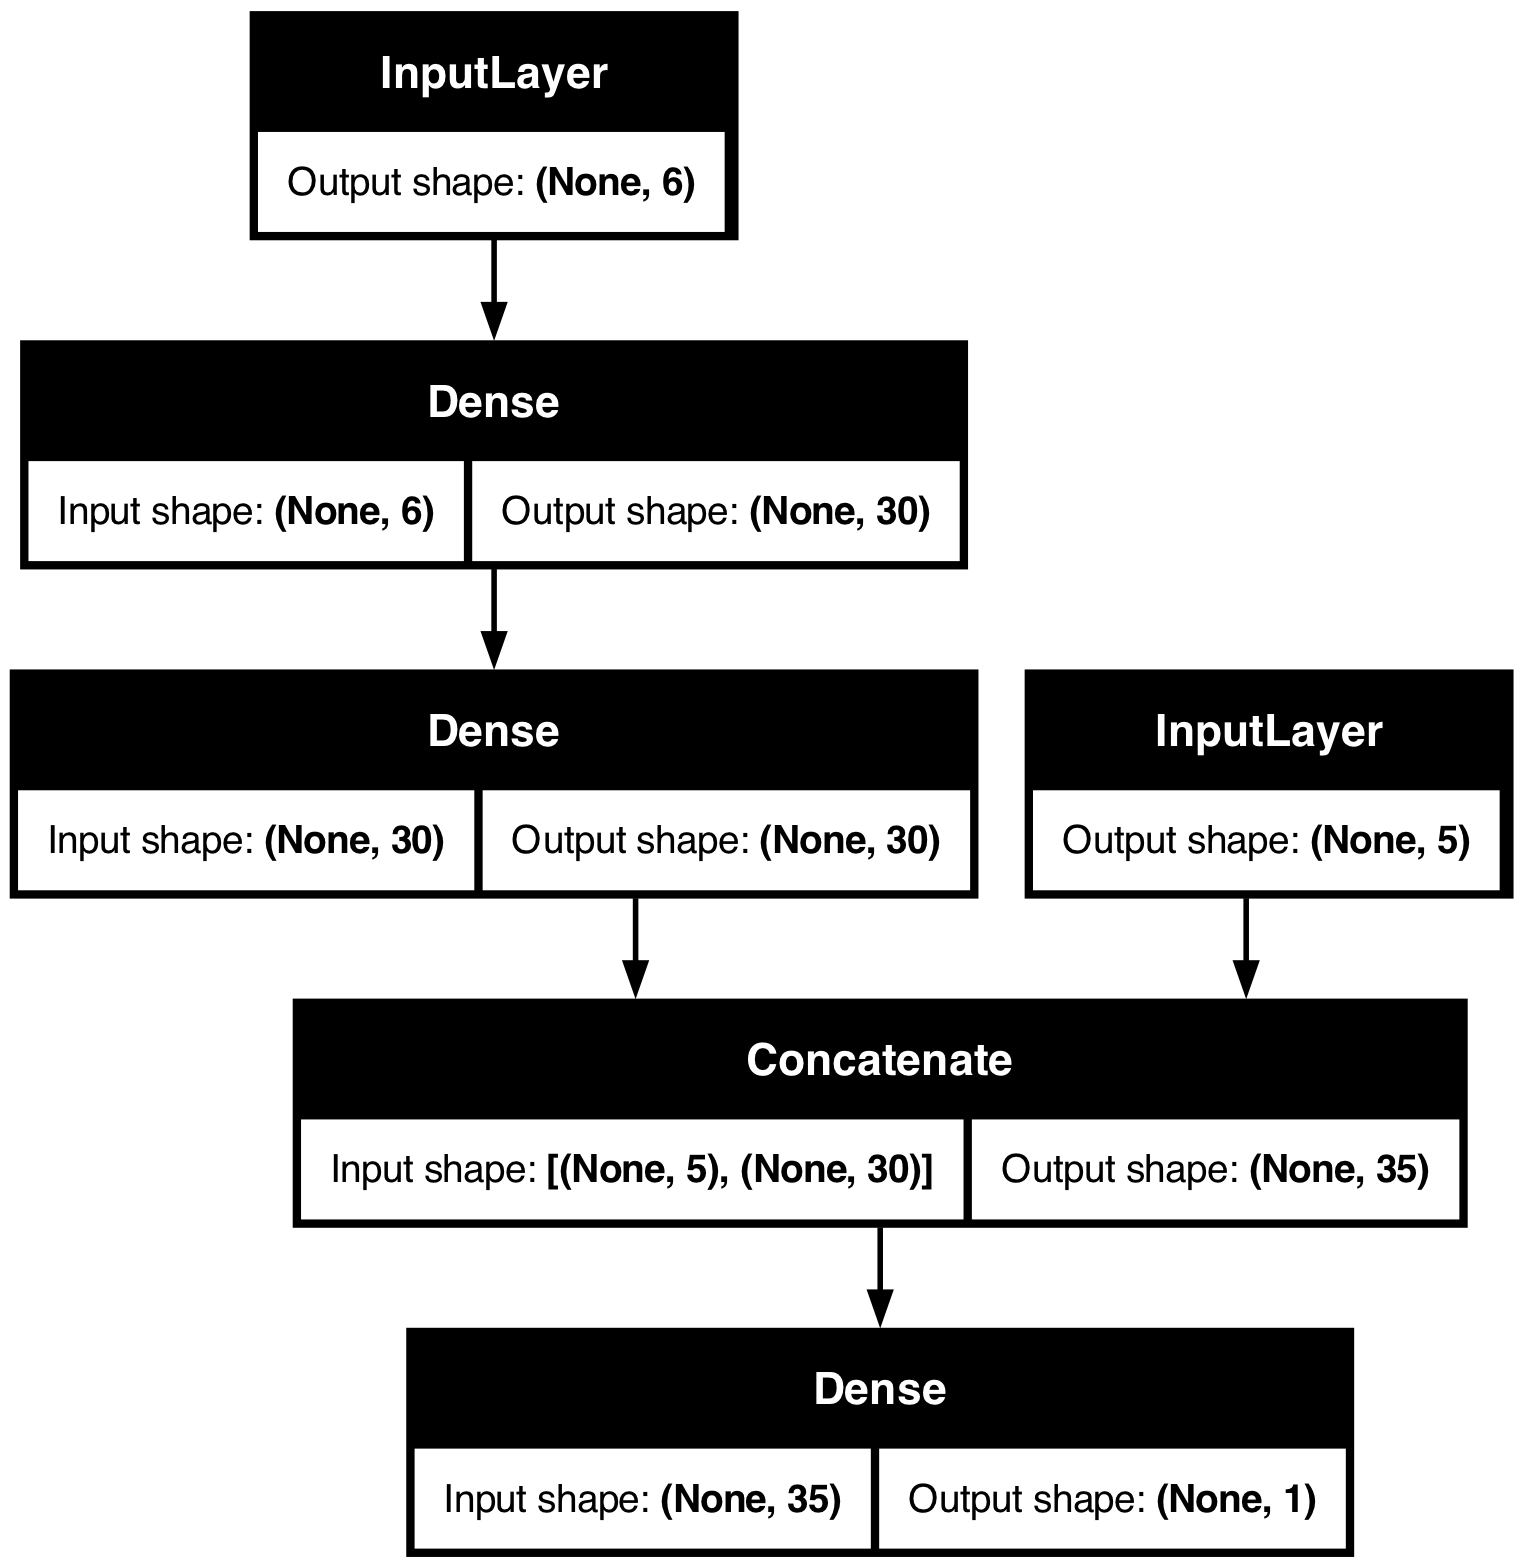

In [37]:
keras.utils.plot_model(model, "split_model.png", show_shapes=True)

In [38]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

In [39]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [40]:
history = model.fit(
    (X_train_A, X_train_B), y_train, epochs=20,
    validation_data=((X_valid_A, X_valid_B), y_valid),
)

Epoch 1/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 709us/step - loss: 2.8725 - val_loss: 1.0320
Epoch 2/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 573us/step - loss: 0.7581 - val_loss: 0.6910
Epoch 3/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step - loss: 0.6410 - val_loss: 0.6404
Epoch 4/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 567us/step - loss: 0.5898 - val_loss: 0.6096
Epoch 5/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 567us/step - loss: 0.5807 - val_loss: 0.5854
Epoch 6/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 563us/step - loss: 0.5605 - val_loss: 0.5649
Epoch 7/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step - loss: 0.5269 - val_loss: 0.5516
Epoch 8/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step - loss: 0.5139 - val_loss: 0.5374
Epoch 9/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step - loss: 0.5175 - val_loss: 0.5322
Epoch 10/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step - loss: 0.5061 - val_loss: 0.5209
Epoch 11/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step - loss: 0.4870 - val_loss: 0.5128
Epoch 12/20
413/413 ━━━━━━━━━━

In [41]:
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step - loss: 0.4732
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


In [42]:
print(mse_test)
print(y_pred)

0.47225502133369446
[[0.4228349]
 [1.8433051]
 [3.0284238]]


In [43]:
# Additional output
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="auxilliary_output")(hidden2)
model_aux = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

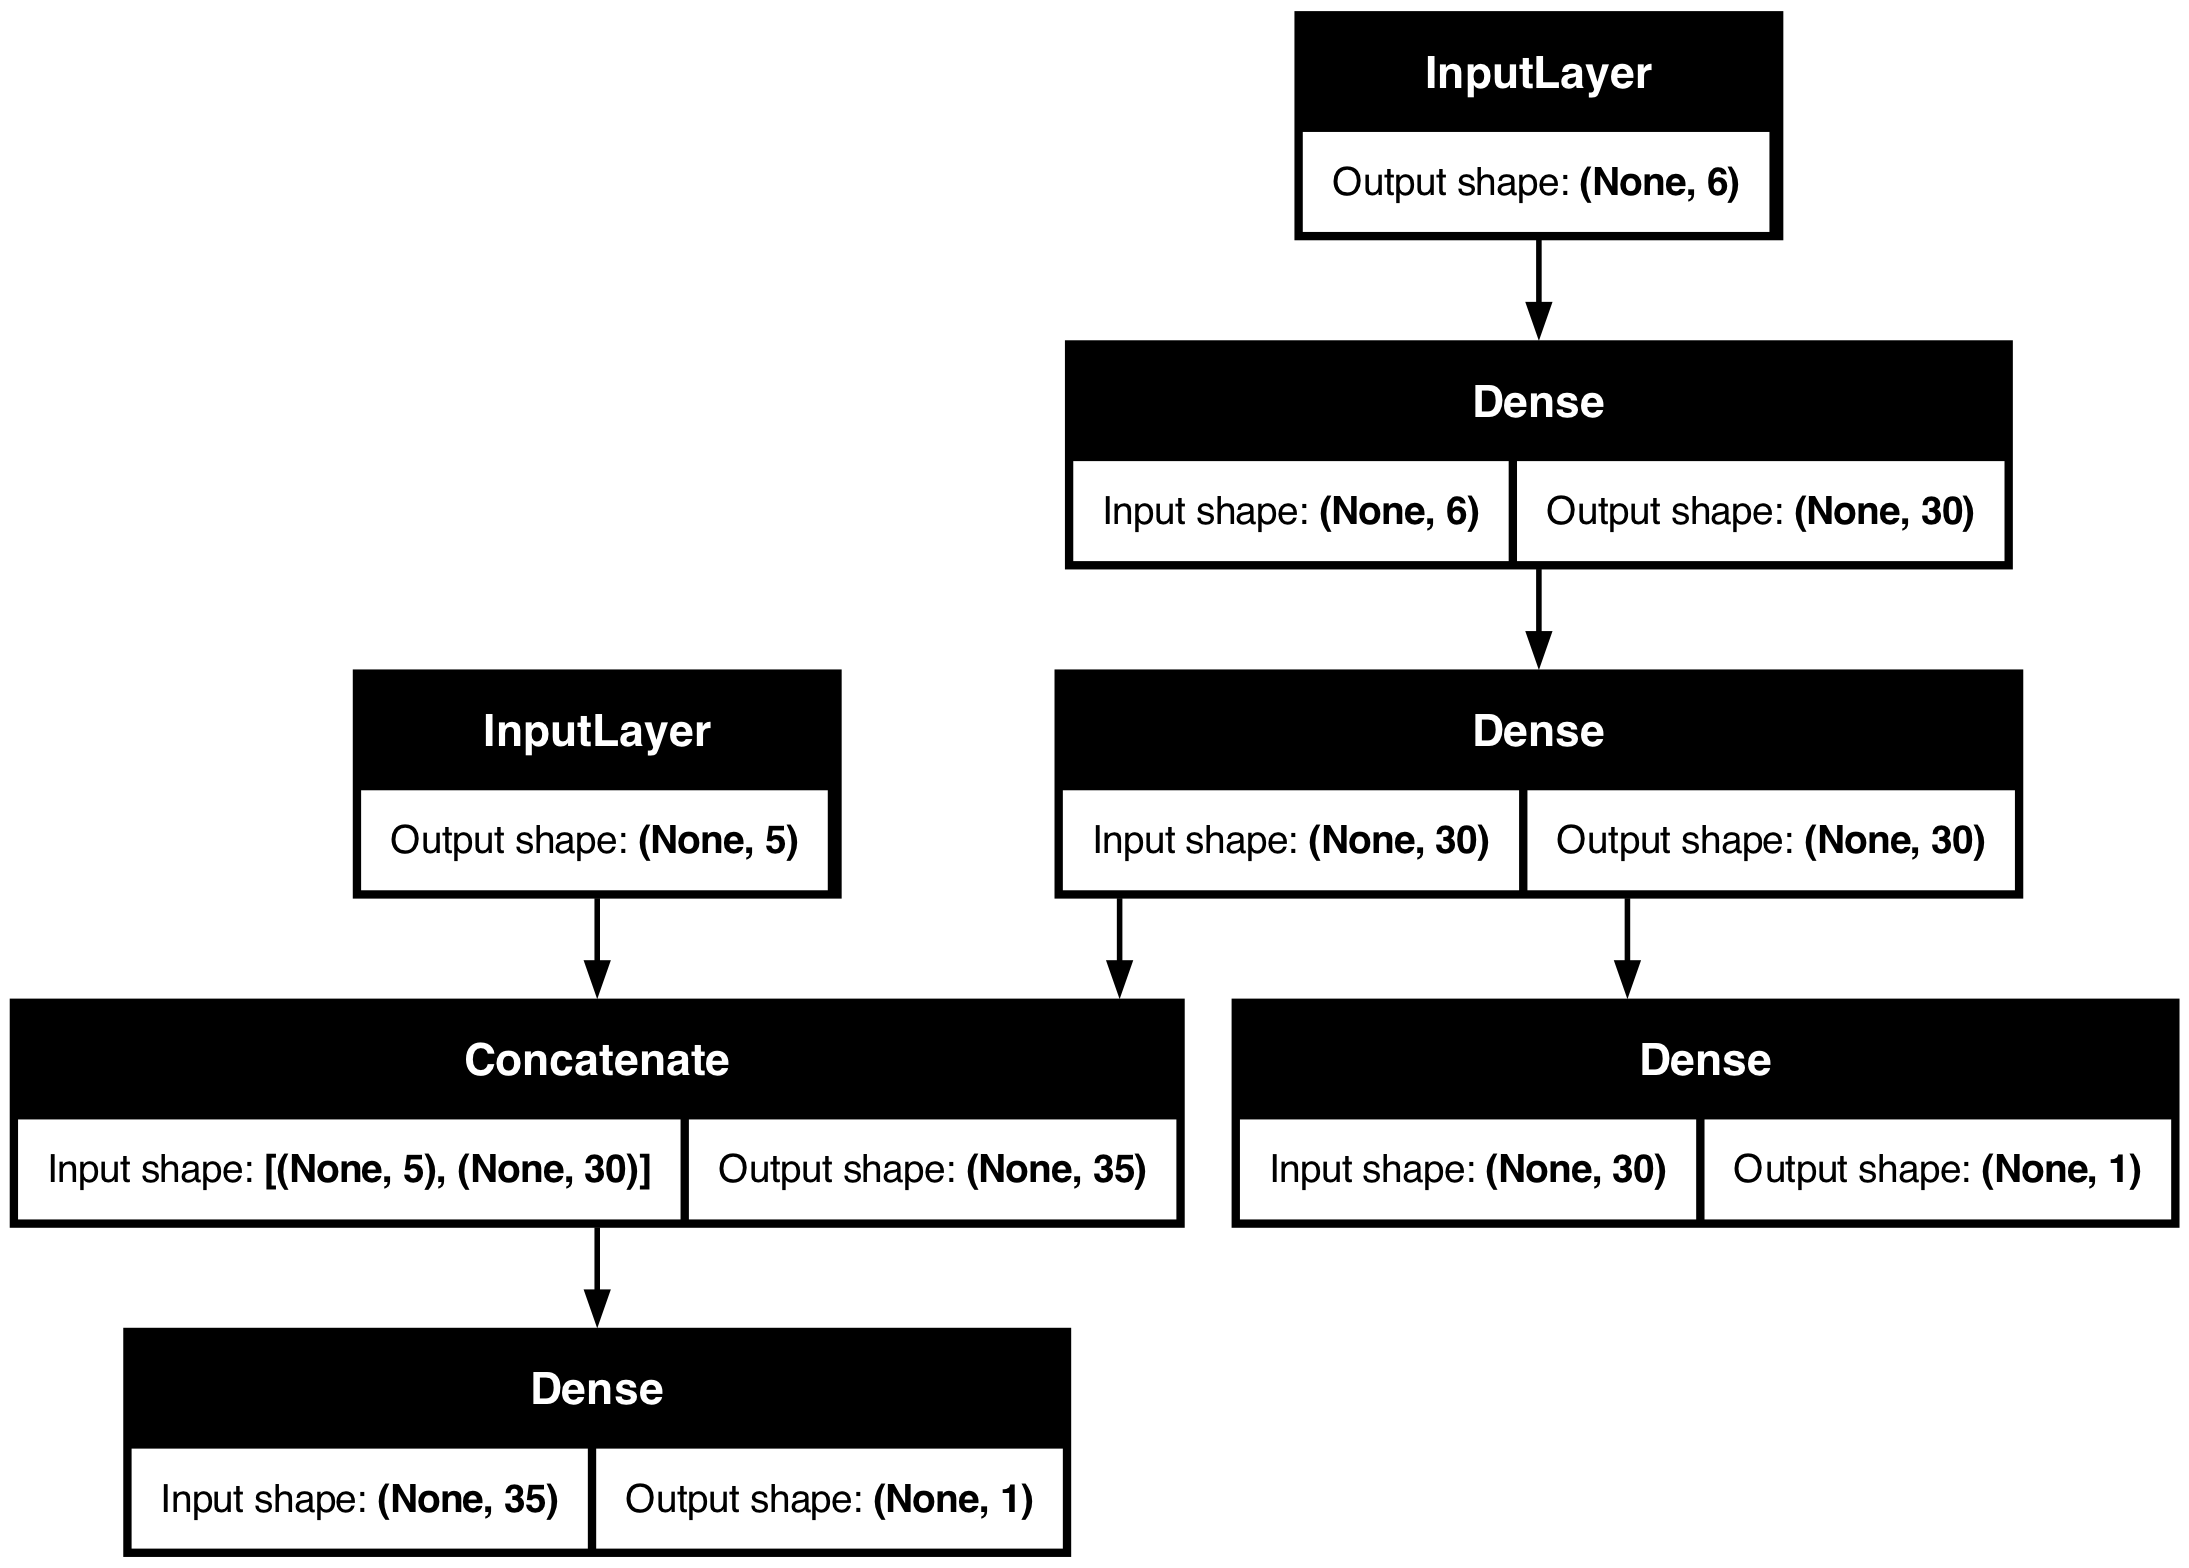

In [44]:
keras.utils.plot_model(model_aux, show_shapes=True)

In [45]:
model_aux.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="SGD")

In [46]:
history = model_aux.fit(
    [X_train_A, X_train_B], [y_train, y_train], epochs=20,
    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]),
)

Epoch 1/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 846us/step - auxilliary_output_loss: 2.2617 - loss: 1.6628 - main_output_loss: 1.5962 - val_auxilliary_output_loss: 1.0983 - val_loss: 0.6130 - val_main_output_loss: 0.5572
Epoch 2/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step - auxilliary_output_loss: 0.9508 - loss: 0.5202 - main_output_loss: 0.4724 - val_auxilliary_output_loss: 0.8917 - val_loss: 0.5061 - val_main_output_loss: 0.4619
Epoch 3/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step - auxilliary_output_loss: 0.8025 - loss: 0.4902 - main_output_loss: 0.4555 - val_auxilliary_output_loss: 0.7820 - val_loss: 0.4913 - val_main_output_loss: 0.4577
Epoch 4/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 612us/step - auxilliary_output_loss: 0.7035 - loss: 0.4503 - main_output_loss: 0.4222 - val_auxilliary_output_loss: 0.7222 - val_loss: 0.4773 - val_main_output_loss: 0.4489
Epoch 5/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 604us/step - auxilliary_output_loss: 0.6377 - loss: 0.4367 - main_output_loss: 0.4143 - val_a

In [47]:
total_loss, main_loss, aux_loss = model_aux.evaluate(
    [X_test_A, X_test_B], [y_test, y_test]
)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step - auxilliary_output_loss: 0.4639 - loss: 0.3746 - main_output_loss: 0.3647


In [48]:
print(total_loss, main_loss, aux_loss)

0.3752671182155609 0.3654213547706604 0.46387895941734314


In [49]:
y_pred_main, y_pred_aux = model_aux.predict([X_new_A, X_new_B])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


In [50]:
print(y_pred_main)
print(y_pred_aux)

[[0.51372707]
 [1.5204506 ]
 [3.3800724 ]]
[[0.5838392]
 [1.8160331]
 [3.046532 ]]


## Subclass Interface

In [51]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

In [52]:
model = WideAndDeepModel(30, activation="relu")
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Epoch 1/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 975us/step - loss: 2.7971 - mse_loss: 4.0977 - val_loss: 1.1014 - val_mse_loss: 2.6468
Epoch 2/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step - loss: 0.9455 - mse_loss: 2.1425 - val_loss: 0.8942 - val_mse_loss: 1.9982
Epoch 3/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step - loss: 0.8034 - mse_loss: 1.5760 - val_loss: 0.8129 - val_mse_loss: 1.7678
Epoch 4/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step - loss: 0.7403 - mse_loss: 1.4064 - val_loss: 0.7580 - val_mse_loss: 1.6520
Epoch 5/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 649us/step - loss: 0.6776 - mse_loss: 1.2709 - val_loss: 0.7127 - val_mse_loss: 1.5325
Epoch 6/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step - loss: 0.6556 - mse_loss: 1.2071 - val_loss: 0.6757 - val_mse_loss: 1.4236
Epoch 7/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step - loss: 0.6252 - mse_loss: 1.2149 - val_loss: 0.6491 - val_mse_loss: 1.3266
Epoch 8/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - loss: 0.5986 - mse_loss: 1.1452 - 

In [53]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [54]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

/Users/Bartek/Desktop/Bartek/Programowanie/Portfolio/venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [55]:
model.compile(loss=["mse"], optimizer=keras.optimizers.SGD(learning_rate=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.keras", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.keras")
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 752us/step - loss: 2.9003 - val_loss: 1.0457
Epoch 2/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step - loss: 0.8466 - val_loss: 0.7693
Epoch 3/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - loss: 0.6953 - val_loss: 0.6869
Epoch 4/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 567us/step - loss: 0.6346 - val_loss: 0.6358
Epoch 5/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step - loss: 0.5946 - val_loss: 0.5996
Epoch 6/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step - loss: 0.5648 - val_loss: 0.5727
Epoch 7/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step - loss: 0.5423 - val_loss: 0.5520
Epoch 8/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step - loss: 0.5250 - val_loss: 0.5356
Epoch 9/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step - loss: 0.5113 - val_loss: 0.5222
Epoch 10/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 725us/step - loss: 0.5000 - val_loss: 0.5108
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step - loss: 0.5250


In [56]:
early_stopping = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping])

Epoch 1/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 850us/step - loss: 0.4905 - val_loss: 0.5010
Epoch 2/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 649us/step - loss: 0.4822 - val_loss: 0.4923
Epoch 3/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 643us/step - loss: 0.4750 - val_loss: 0.4847
Epoch 4/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step - loss: 0.4683 - val_loss: 0.4777
Epoch 5/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step - loss: 0.4622 - val_loss: 0.4713
Epoch 6/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step - loss: 0.4563 - val_loss: 0.4652
Epoch 7/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step - loss: 0.4509 - val_loss: 0.4597
Epoch 8/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step - loss: 0.4459 - val_loss: 0.4546
Epoch 9/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step - loss: 0.4411 - val_loss: 0.4499
Epoch 10/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step - loss: 0.4367 - val_loss: 0.4455
Epoch 11/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step - loss: 0.4326 - val_loss: 0.4414
Epoch 12/100
413/41

## TensorBoard

In [57]:
import os


root_logdir = os.path.join(os.curdir, "my_runs")

In [58]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

In [59]:
run_logdir = get_run_logdir()
run_logdir

'./my_runs/run_2025_04_08-16_15_43'

In [60]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard_cb])

Epoch 1/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step - loss: 0.3297 - val_loss: 0.3586
Epoch 2/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - loss: 0.3293 - val_loss: 0.3582
Epoch 3/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 640us/step - loss: 0.3290 - val_loss: 0.3579
Epoch 4/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step - loss: 0.3286 - val_loss: 0.3576
Epoch 5/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step - loss: 0.3282 - val_loss: 0.3572
Epoch 6/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 612us/step - loss: 0.3278 - val_loss: 0.3568
Epoch 7/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step - loss: 0.3275 - val_loss: 0.3564
Epoch 8/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step - loss: 0.3271 - val_loss: 0.3560
Epoch 9/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step - loss: 0.3267 - val_loss: 0.3555
Epoch 10/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/step - loss: 0.3263 - val_loss: 0.3553
Epoch 11/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 749us/step - loss: 0.3259 - val_loss: 0.3549
Epoch 12/30
413/413 ━━━━━━━━━━

## Excercise

In [61]:
# loading data
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [63]:
# there are 60k examples of images with 28x28 pixels
X_train_full.shape

(60000, 28, 28)

In [64]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

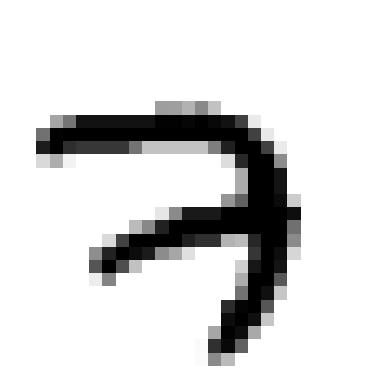

In [67]:
# Creating image:
plt.imshow(X_train[0], cmap="binary")
plt.axis("off")
plt.show()

In [68]:
X_train.shape

(55000, 28, 28)

In [69]:
X_valid.shape

(5000, 28, 28)

In [70]:
X_test.shape

(10000, 28, 28)

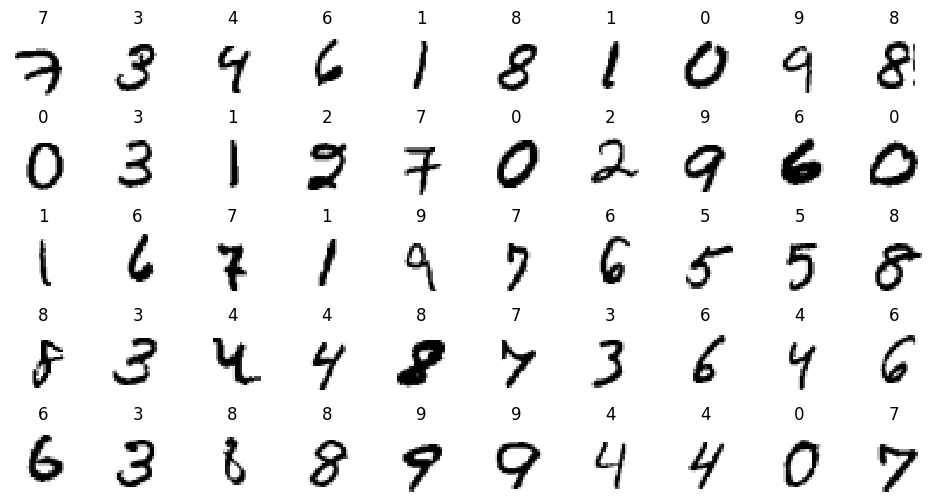

In [72]:
# Showing example images from the dataset:
n_rows = 5
n_columns = 10

plt.figure(figsize=(n_columns * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_columns):
        index = n_columns * row + col
        plt.subplot(n_rows, n_columns, index + 1)
        plt.imshow(X_train[index], cmap='binary', interpolation='nearest')
        plt.axis('off')
        plt.title(y_train[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()